# Problem 2 (5 points)

Complete ***Problem 2*** in the `STA410_CC2_PyMC.ipynb` file.
- You will use `X` and `y` generated in ***Problem 1***, so recreate that data in the `STA410_CC2_PyMC.ipynb` file.

In [50]:
# Add the necessary import statements here
# or you may also add them in your code below prior to using them
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az


# Problem 2 (5 points)

0. (2 points) Provide a ***Hamiltonian Monte Carlo (HMC)*** based ***Bayesian posterior analysis*** for the ***Poisson regression*** of `y` on `X` for the data generated in ***Problem 1***.

    - Provide a visual posterior analysis of your HMC results by graphically displaying the posterior distribution samples of your model parameters.
    - Plot the log of the ***posterior predicted value*** of each `y` versus the log of the observed `y`.
    
  ***Hint***: make sure the shapes of your multiplications are correct. `PyMC` requires object shapes to specified correctly relative to the operations they are being used for.
    
    
1. (1 point) Provide a figure and a summary table justifying an assessment of agreement between MCMC chains which suggests convergence of the MCMC algorithm, as well as a figure assessing the general performance of the HMC algorithm overall without reference to specific model coefficients and parameters.


2. (0.5 points) Compute `ess_bulk` and `ess_tail` for the model parameters and interpret these values.


3. (1 points) Provide a ***Bayesian posterior analysis*** for a ***logistic regression*** of `(y>1).asype(int)` on `X` for the data generated in ***Problem 1***.

    - Provide the analogous visual posterior analyses of your HMC results as you did for the ***Poisson regression*** above.


4. (0.5 points) Summarize the similarity and differences in the posterior diagnostics for the ***logistic regression*** versus the ***Poisson regression***.

In [7]:
# p2q0: your code and results will be evaluated visually

# Recreate `X` and `y` from Problem 1
np.random.seed(410)
n,p=100,10
X = stats.norm.rvs(size=(n,p))
X[:,0]=1
X

beta = np.array([(10 - j) / 10 for j in range(p)])

E_y = np.exp(X @ beta)
print(E_y)
# You are welcome to add as many new cells into this notebook as you would like.
# Just do not leave in a state that will produce a runtime errors when notebook cells are run sequentially.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted.
np.random.seed(411)
y = np.random.poisson(E_y)

[1.45426013e+01 8.77226326e+00 2.25583642e+00 2.04507248e+00
 7.97666158e+00 1.20874614e+00 1.19472636e+00 6.36253244e-02
 2.20642523e+00 1.61003896e+02 9.34320756e+00 2.36846712e+01
 7.79104068e-01 9.94085696e-01 5.29664021e+00 2.96087194e+00
 2.93570231e+00 1.00567142e-01 2.91684950e+00 7.74493967e+00
 4.74856275e+00 3.81288206e+00 7.23325901e+00 2.88742605e-01
 1.10084585e+00 7.61625320e-01 4.25337252e-01 1.06479211e+00
 3.62642622e+00 7.85917080e-01 1.94186196e-01 4.94032667e+01
 9.01175320e-01 7.24928003e+00 2.03533166e+01 3.04811941e+00
 4.17791168e+00 6.50250521e+00 1.35476393e+00 2.04976550e-01
 5.91533774e+00 2.84849171e-01 7.56678181e+00 2.56207016e+00
 3.51272151e+00 1.97881541e+00 1.42973765e+01 1.36727808e+00
 6.13828298e+01 4.67900639e+00 2.12069243e+00 6.18475757e-01
 4.45764564e+00 1.09884730e+00 1.05517227e+00 3.29432568e+01
 1.01526417e+00 3.61879551e+00 2.43873191e+01 1.72384846e+00
 2.44829856e-01 1.27622215e+00 7.87179801e-01 3.46550896e+00
 1.85748063e+01 4.615477

In [44]:
# p2q0 (1 point): your code and figures/results will be evaluated visually
with pm.Model() as model:
    # Prior for beta
    beta = pm.Normal("beta", mu=0, sigma=10, shape=p)
    # Link function for Poisson regression
    mu = pm.math.exp(pm.math.dot(X, beta))
    # Likelihood function
    y_obs = pm.Poisson("y_obs", mu=mu, observed=y)
    # Sampling using Hamiltonian Monte Carlo
    trace = pm.sample(3000, tune=1000, cores=1)

# Specify the Poisson regression of `y` on `X`
# and run a PyMC HMC algorithm to produce MCMC samples
# from the posterior distributions of the parameters of this model


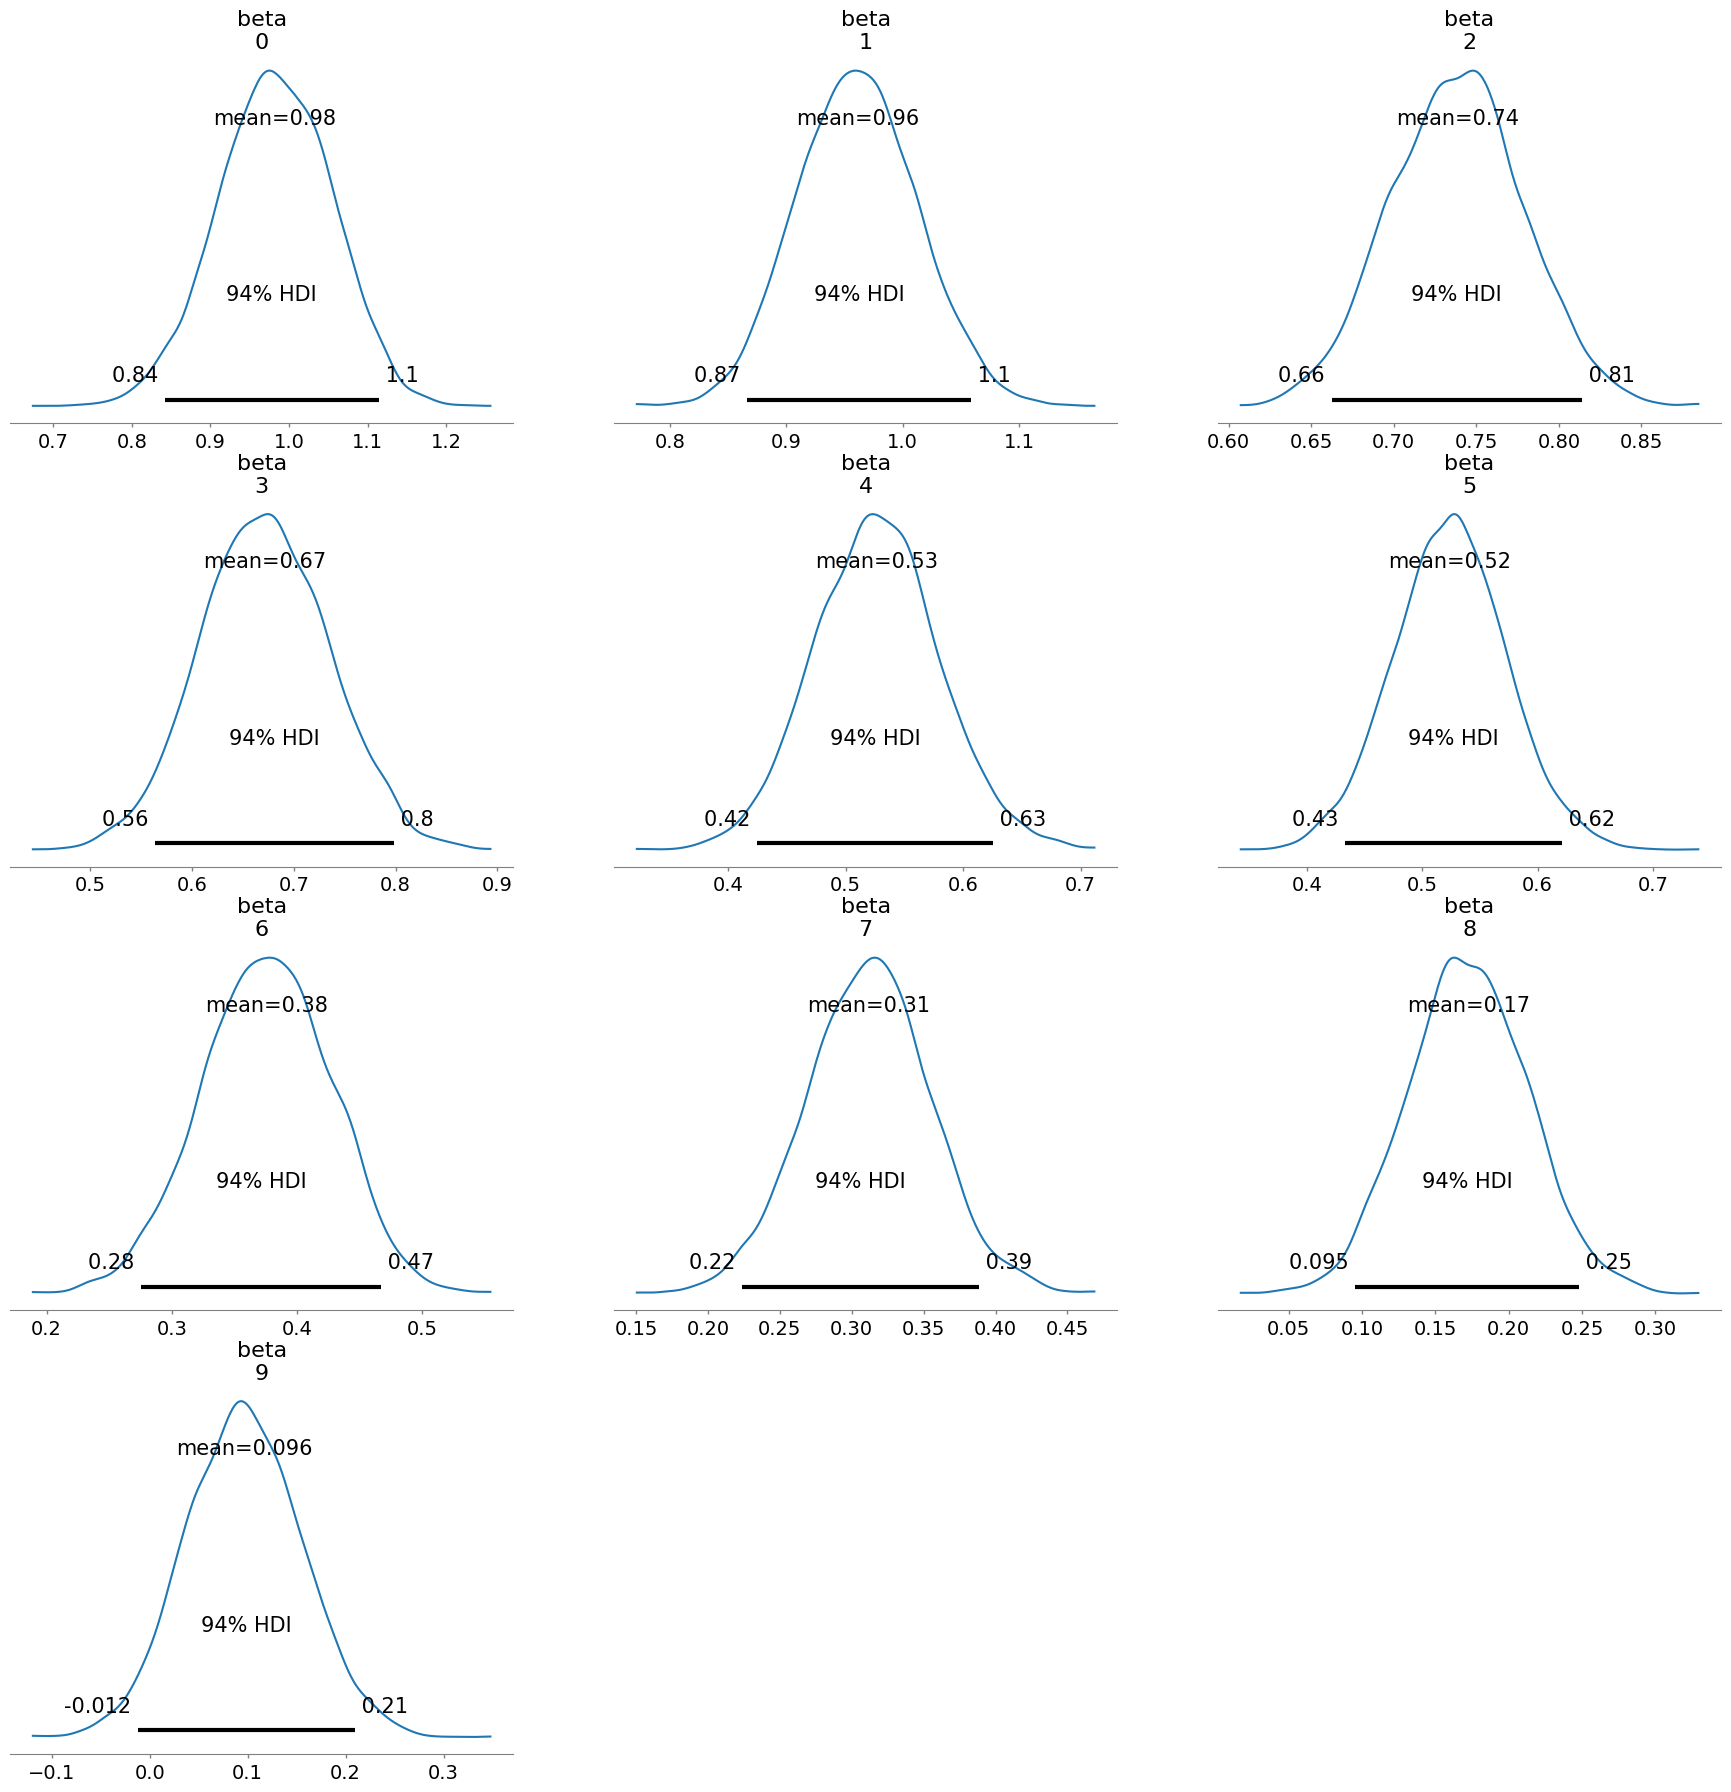

In [45]:
# p2q0 (0.5 points): your code and figures/results will be evaluated visually
az.plot_posterior(trace)
plt.show()
ppc = pm.sample_posterior_predictive(trace, model=model)
# Provide a visual posterior analysis of your HMC results
# by graphically displaying the posterior distribution samples of your model parameters


<ipython-input-46-ed553c2b9b51>:6: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(y), np.log(y_pred))
/usr/local/lib/python3.9/dist-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


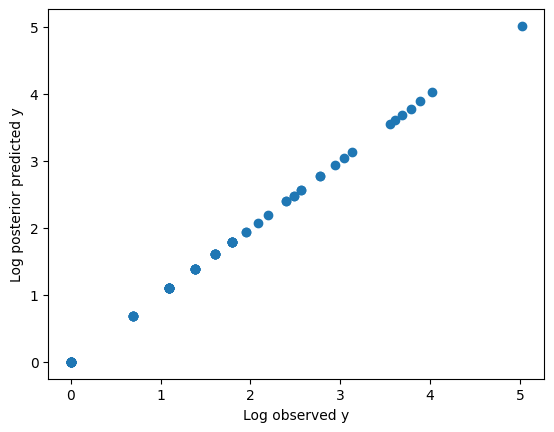

In [46]:
# p2q0 (0.5 points): your code and figures/results will be evaluated visually


y_pred = ppc["observed_data"]["y_obs"]

plt.scatter(np.log(y), np.log(y_pred))
plt.xlabel("Log observed y")
plt.ylabel("Log posterior predicted y")
plt.show()
# Plot the log of the posterior predicted value of each y versus the log of the observed y


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.982,0.073,0.842,1.114,0.001,0.001,3533.0,4044.0,1.0
beta[1],0.961,0.052,0.866,1.059,0.001,0.001,4279.0,4127.0,1.0
beta[2],0.738,0.040,0.662,0.814,0.001,0.000,5317.0,4523.0,1.0
beta[3],0.672,0.063,0.563,0.799,0.001,0.001,5079.0,4967.0,1.0
beta[4],0.526,0.054,0.424,0.626,0.001,0.001,5309.0,4681.0,1.0
beta[5],0.524,0.049,0.433,0.621,0.001,0.001,4199.0,4255.0,1.0
beta[6],0.376,0.052,0.276,0.467,0.001,0.001,4179.0,3972.0,1.0
beta[7],0.312,0.043,0.224,0.389,0.001,0.000,4536.0,4719.0,1.0
beta[8],0.172,0.041,0.095,0.248,0.001,0.000,4480.0,4986.0,1.0
beta[9],0.096,0.059,-0.012,0.209,0.001,0.001,4975.0,4313.0,1.0


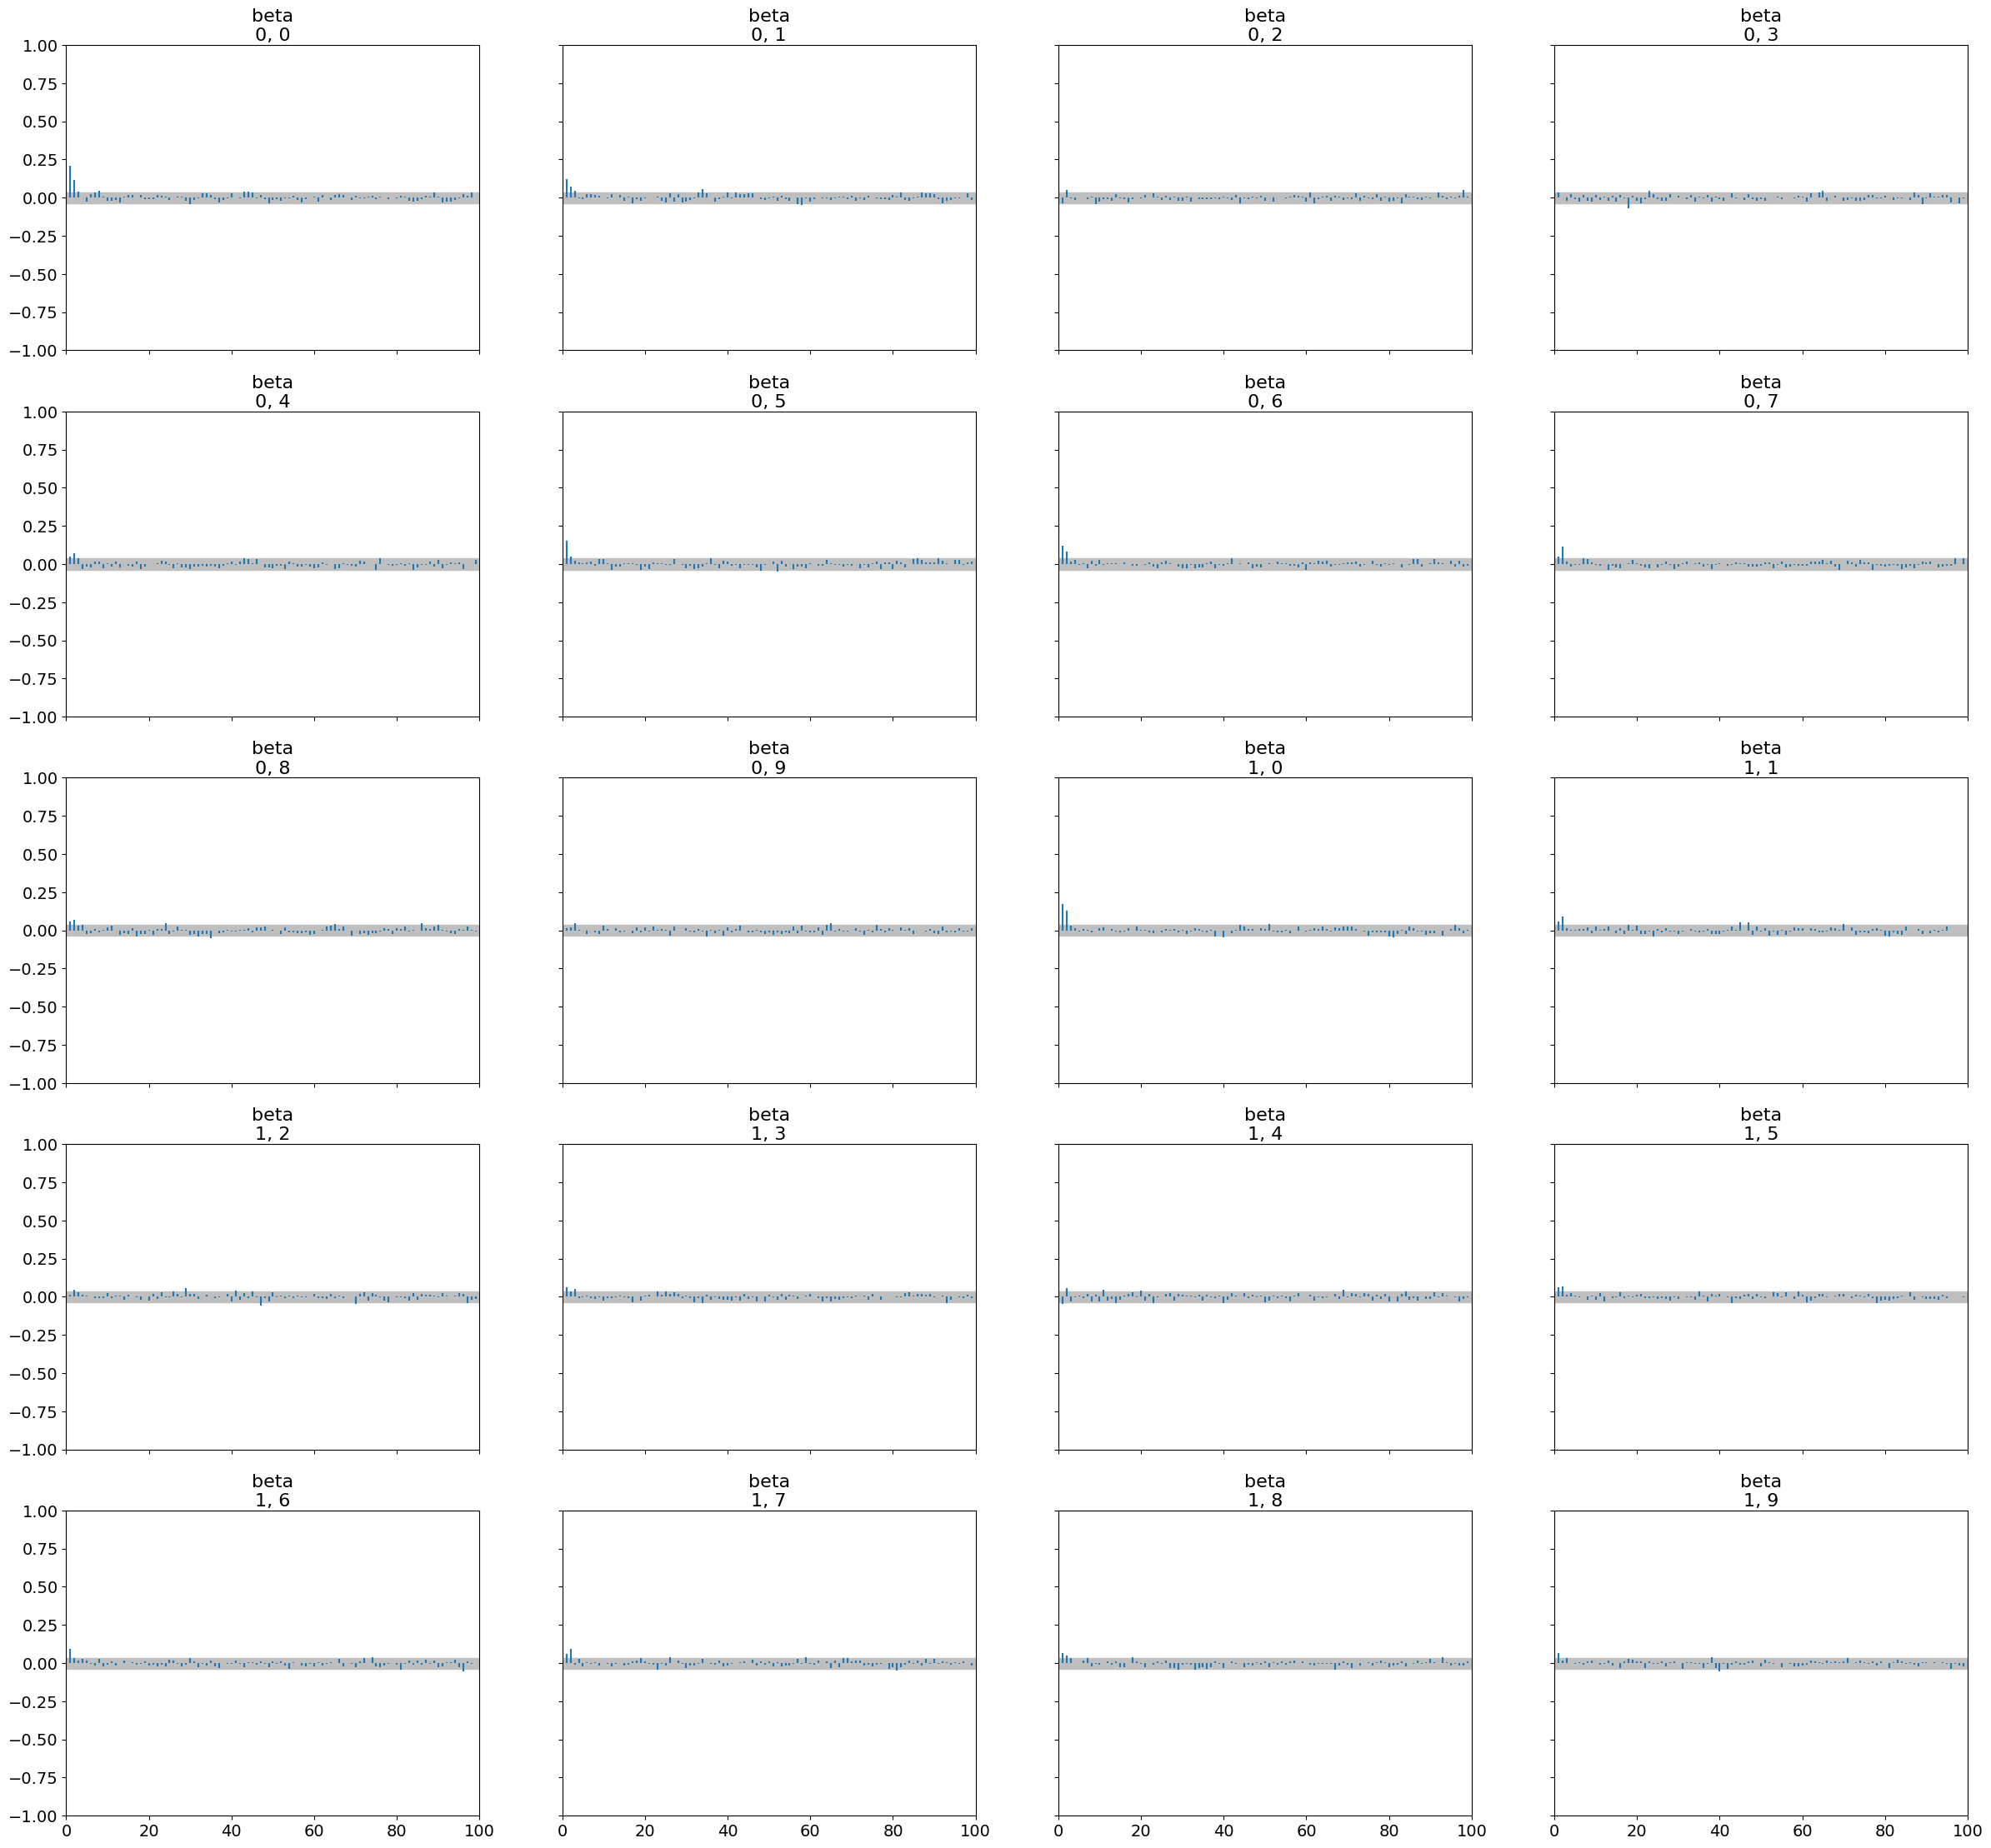

In [52]:
# p2q1 (1 point): your code and figures/results will be evaluated visually
az.plot_autocorr(trace)
az.summary(trace)



# Use a figure to demonstrate agreement of parameter MCMC chains
# Complement the figure with a summary table of relevant diagnostic statistics
# Provide a figure assessing the overall performance of the HMC algorithm


In [53]:
# p2q2 (1/2 points): your written comments will be reviewed
az.summary(trace)
# Compute `ess_bulk` and `ess_tail` for the model parameters and interpret these values
#These values for ESS_Bulk and ESS_Tail are very high which means that the 
#number of independent samples from the posterior distribution that are 
#available in the trace is very high. This is a good metric for showing that 
#the HMC algorithm performed very well.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.982,0.073,0.842,1.114,0.001,0.001,3533.0,4044.0,1.0
beta[1],0.961,0.052,0.866,1.059,0.001,0.001,4279.0,4127.0,1.0
beta[2],0.738,0.040,0.662,0.814,0.001,0.000,5317.0,4523.0,1.0
beta[3],0.672,0.063,0.563,0.799,0.001,0.001,5079.0,4967.0,1.0
beta[4],0.526,0.054,0.424,0.626,0.001,0.001,5309.0,4681.0,1.0
beta[5],0.524,0.049,0.433,0.621,0.001,0.001,4199.0,4255.0,1.0
beta[6],0.376,0.052,0.276,0.467,0.001,0.001,4179.0,3972.0,1.0
beta[7],0.312,0.043,0.224,0.389,0.001,0.000,4536.0,4719.0,1.0
beta[8],0.172,0.041,0.095,0.248,0.001,0.000,4480.0,4986.0,1.0
beta[9],0.096,0.059,-0.012,0.209,0.001,0.001,4975.0,4313.0,1.0


These values for ESS_Bulk and ESS_Tail are very high which means that the 
number of independent samples from the posterior distribution that are 
available in the trace is very high. This is a good metric for showing that 
the HMC algorithm performed very well.

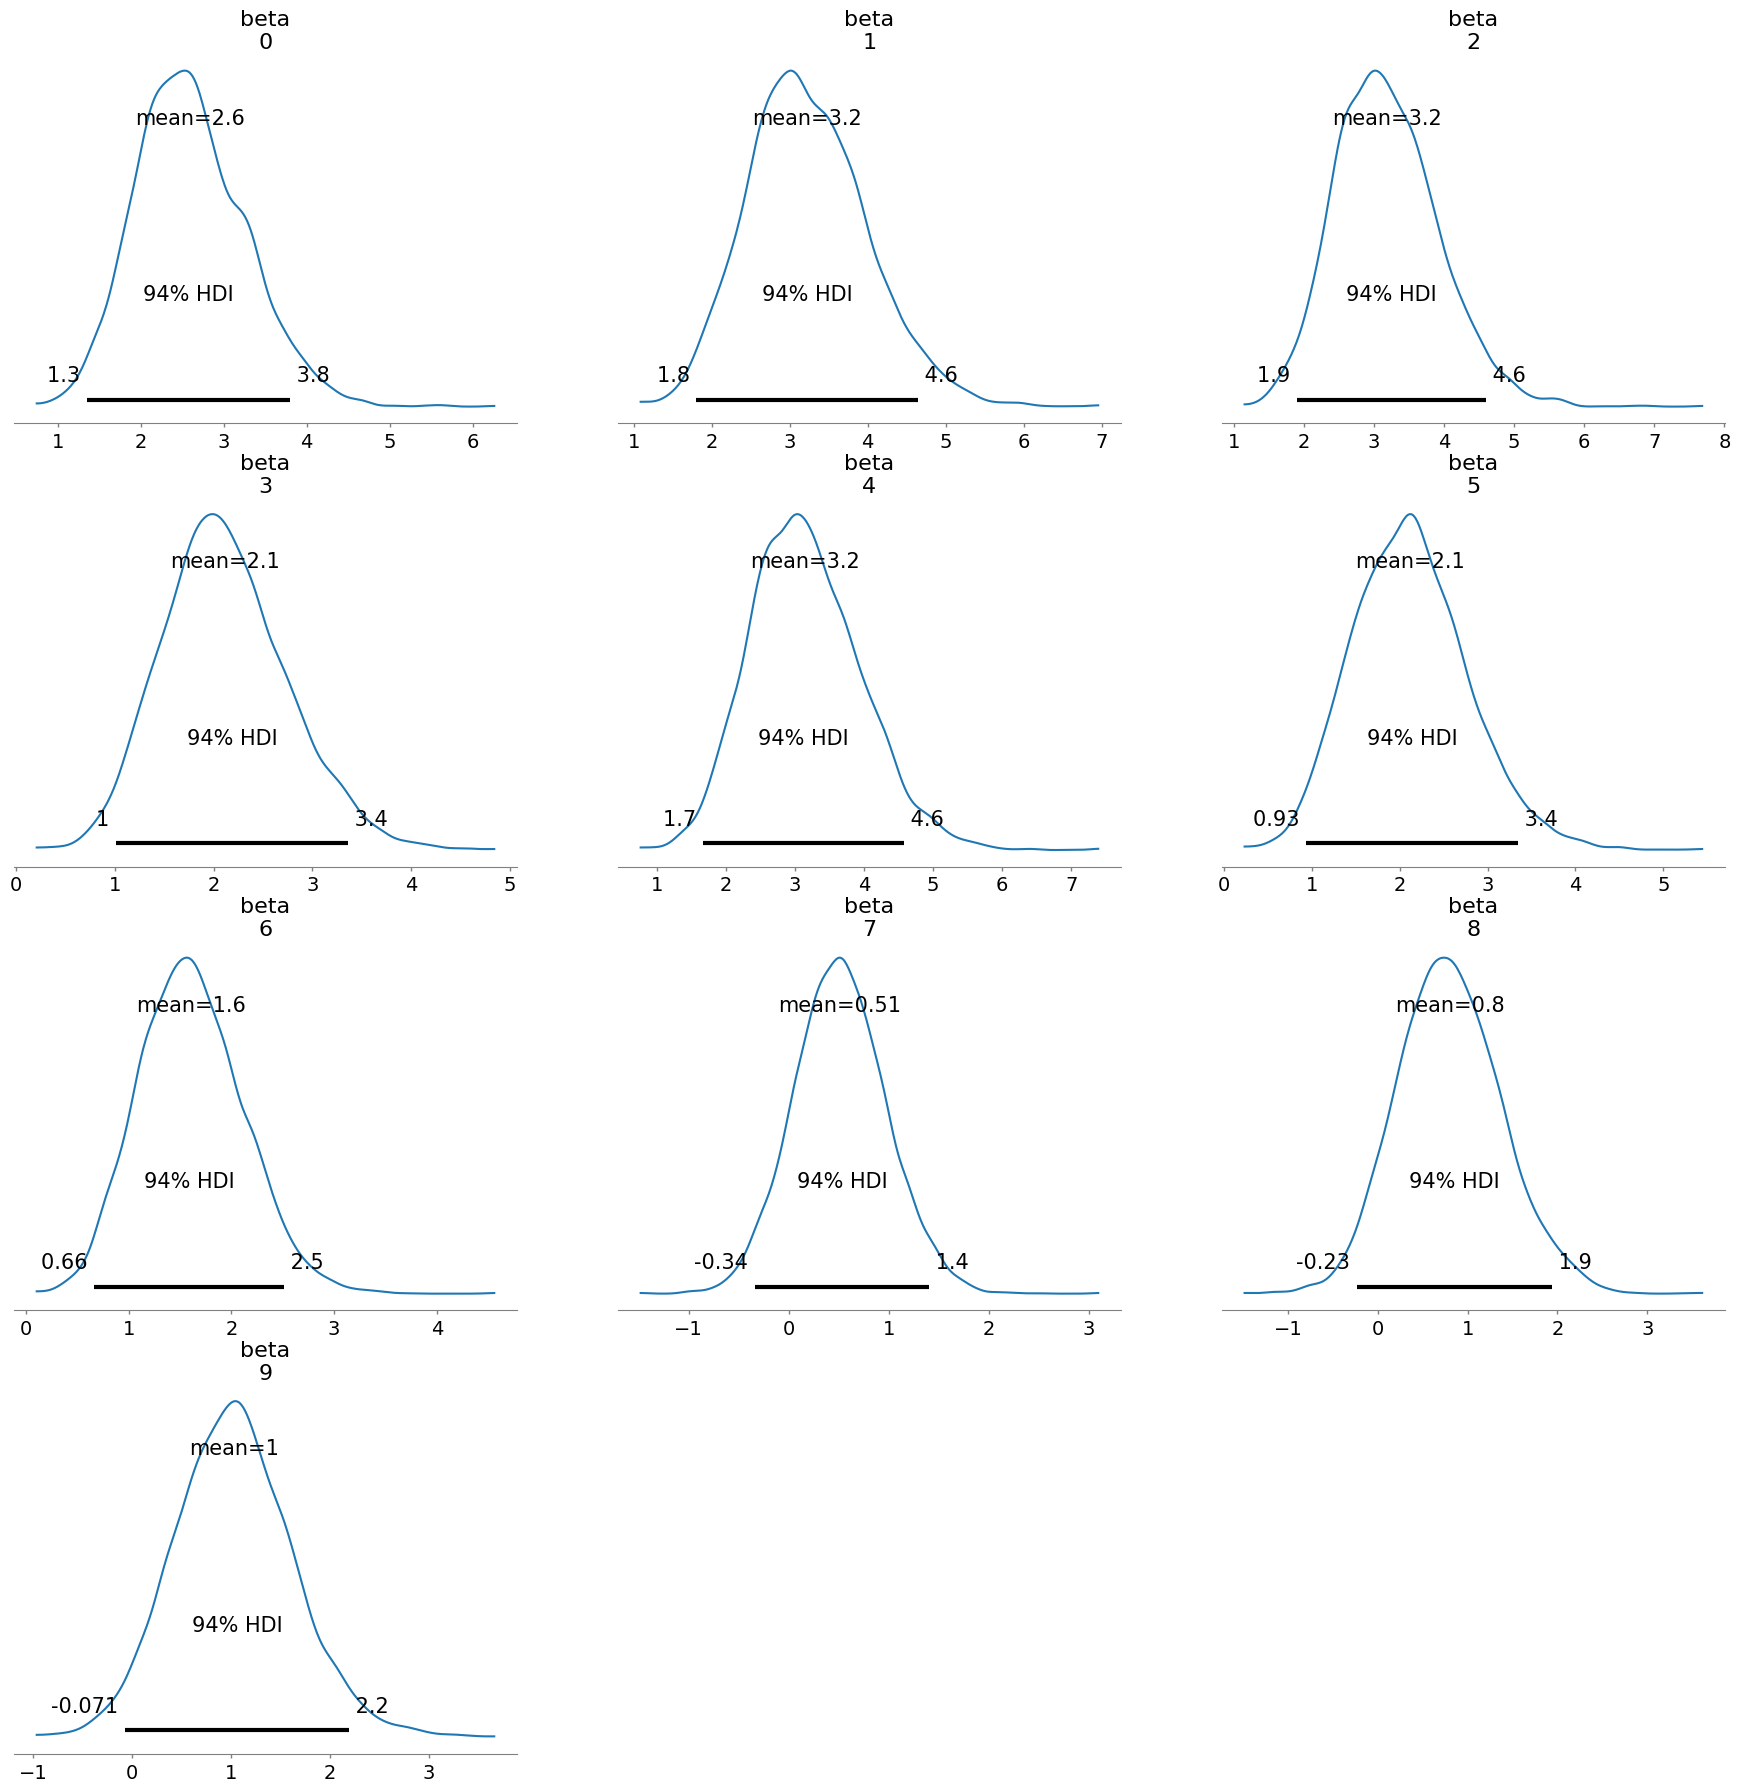

<ipython-input-58-03e854a1d1a2>:22: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(y), np.log(y_pred))
/usr/local/lib/python3.9/dist-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


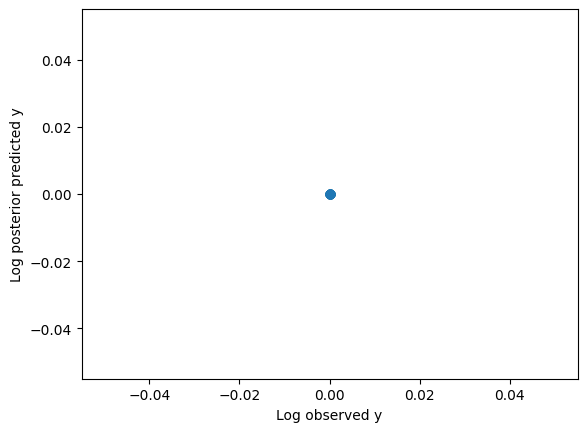

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],2.596,0.662,1.349,3.797,0.015,0.010,2127.0,3069.0,1.0
beta[1],3.225,0.765,1.804,4.642,0.017,0.012,2064.0,2659.0,1.0
beta[2],3.190,0.737,1.897,4.605,0.017,0.012,1930.0,2785.0,1.0
beta[3],2.118,0.632,1.016,3.359,0.012,0.009,2744.0,3640.0,1.0
beta[4],3.152,0.798,1.661,4.582,0.018,0.013,1954.0,2763.0,1.0
beta[5],2.117,0.656,0.930,3.351,0.013,0.010,2518.0,3150.0,1.0
beta[6],1.609,0.506,0.664,2.512,0.009,0.007,2969.0,3347.0,1.0
beta[7],0.510,0.463,-0.341,1.402,0.006,0.005,6171.0,3892.0,1.0
beta[8],0.798,0.581,-0.235,1.936,0.009,0.007,3908.0,3704.0,1.0
beta[9],1.025,0.603,-0.071,2.187,0.008,0.006,5424.0,4432.0,1.0


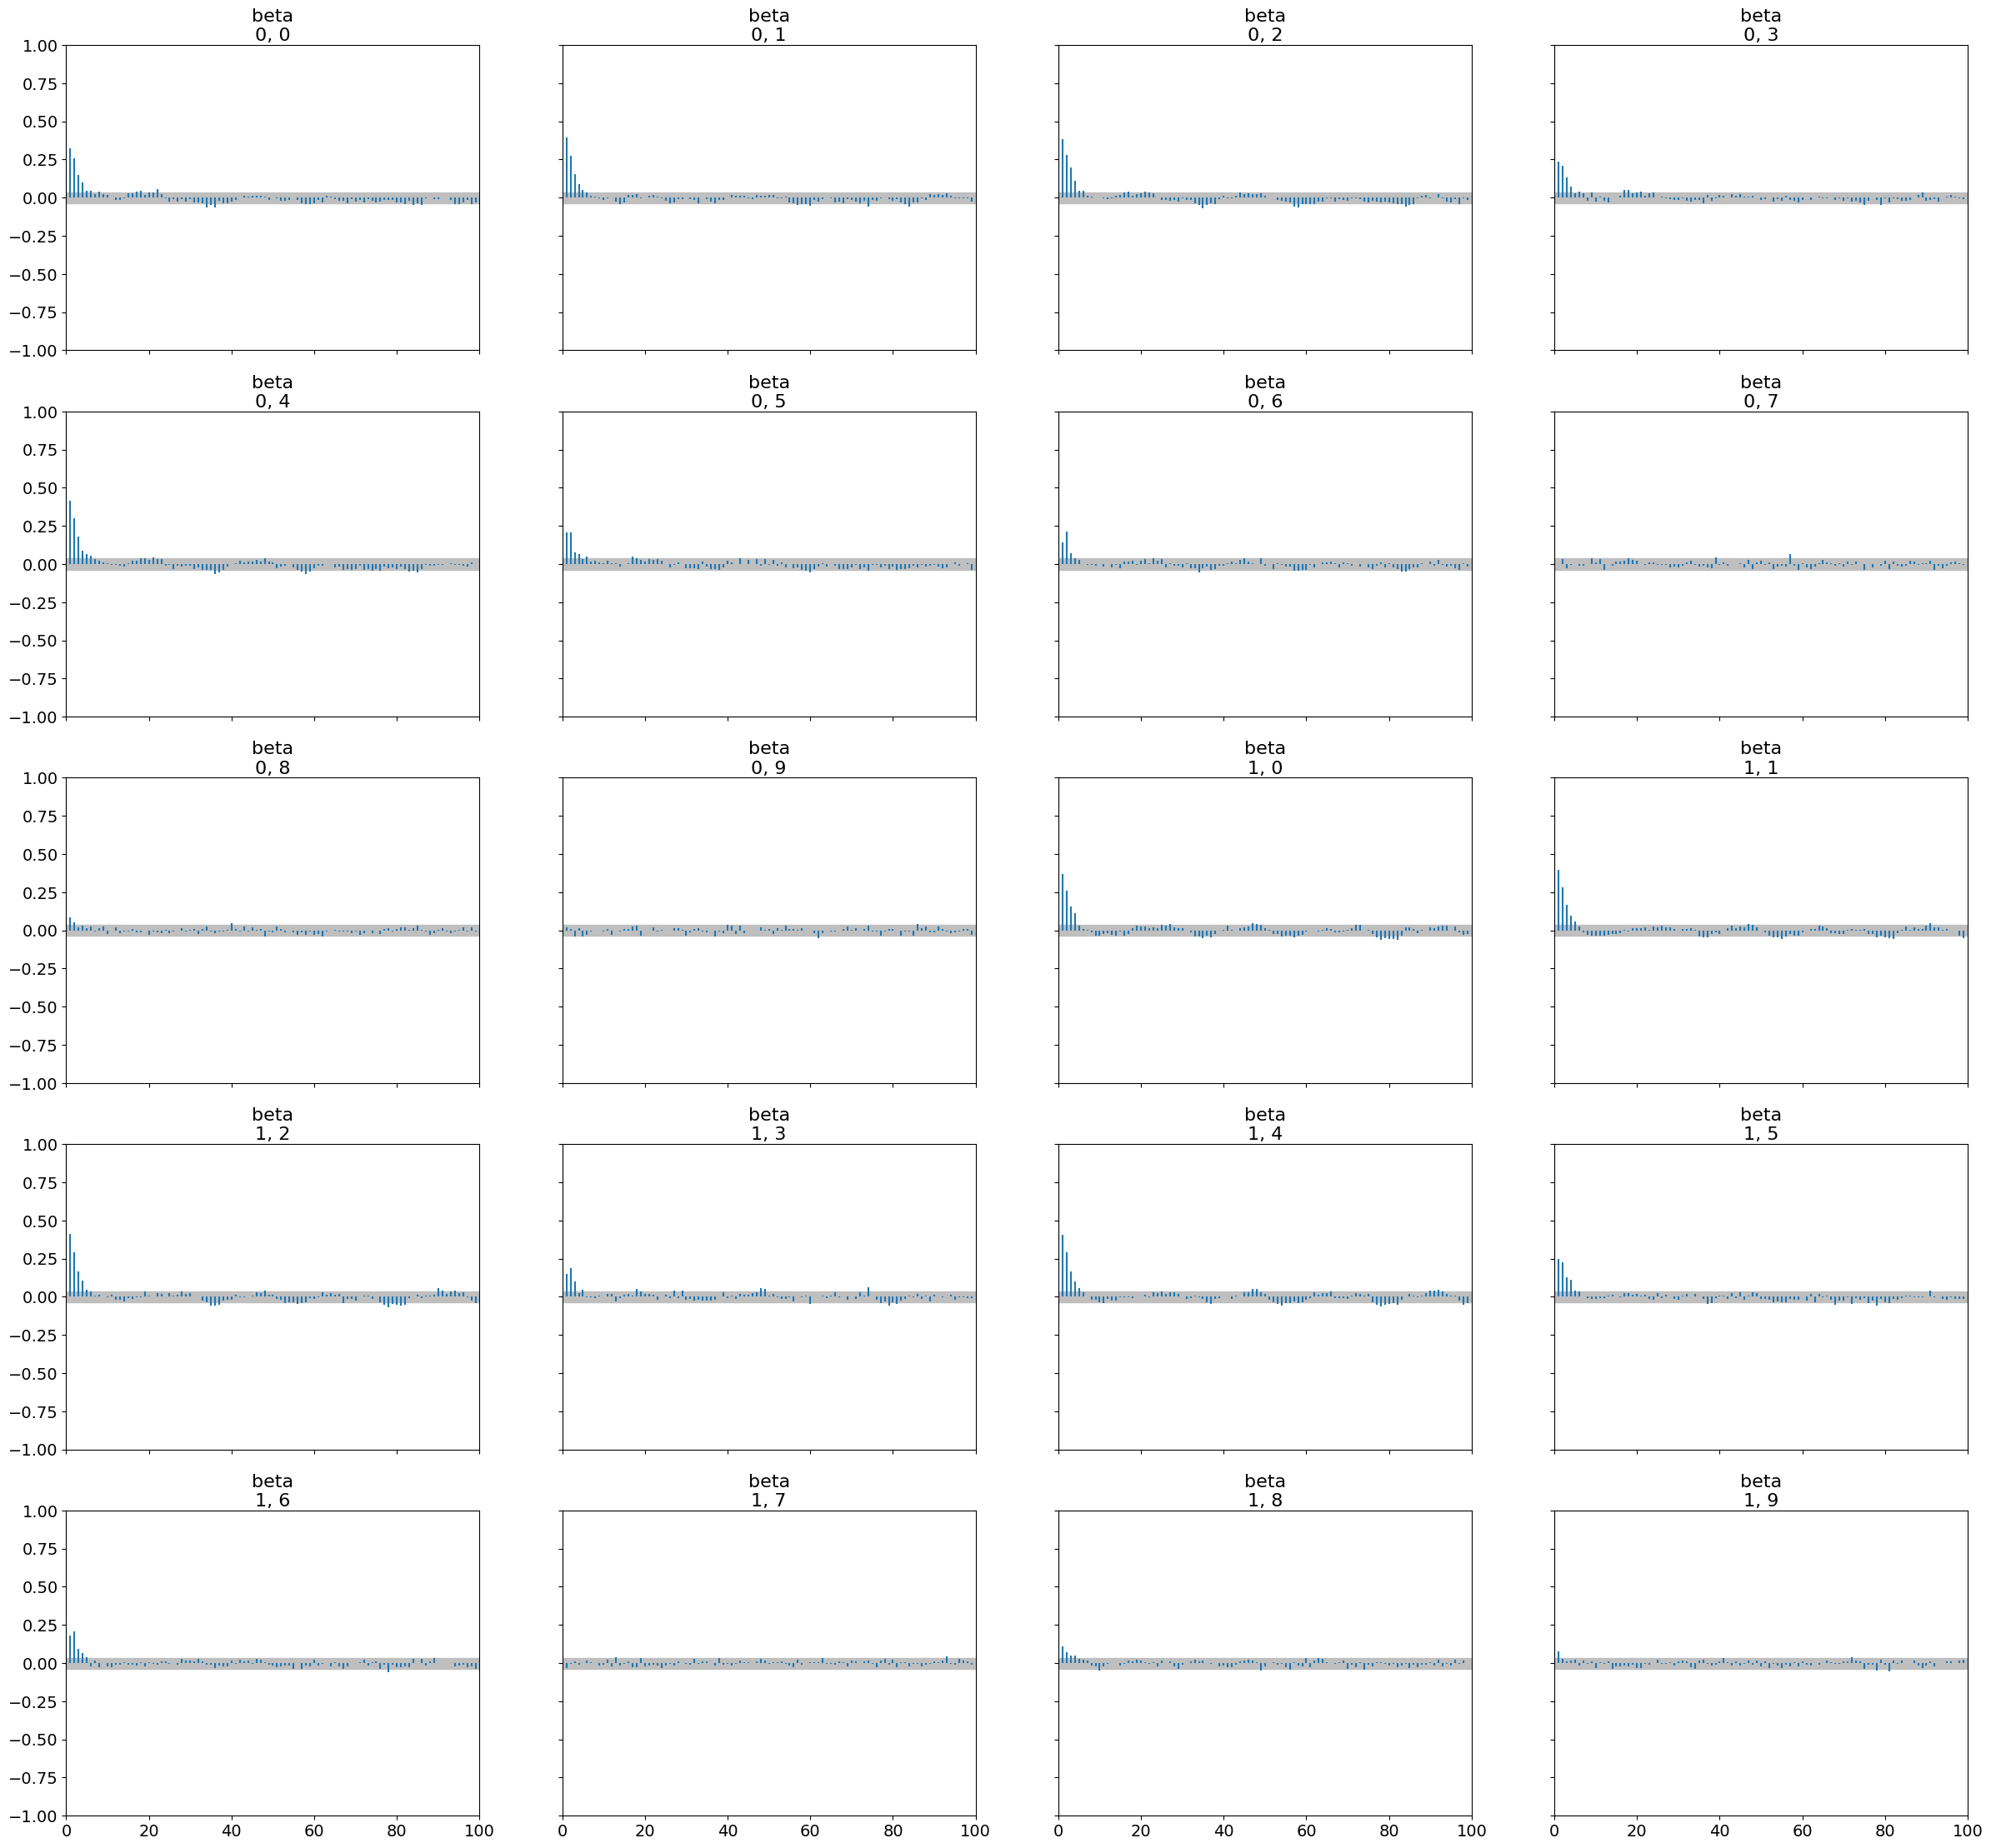

In [58]:
# p2q3 (1 point): your code and figures/results will be evaluated visually
np.random.seed(410)
n, p = 100, 10
X = np.random.normal(size=(n, p))
X[:, 0] = 1
beta = np.array([(10 - j) / 10 for j in range(p)])
E_y = np.exp(np.dot(X, beta))
y = np.random.poisson(E_y)
y = (y > 1).astype(int)

with pm.Model() as model:
    beta = pm.Normal("beta", mu=0, tau=1 / 10**2, shape=p)
    mu = pm.math.sigmoid(pm.math.dot(X, beta))
    y_obs = pm.Bernoulli("y_obs", p=mu, observed=y)
    trace = pm.sample(3000, chains=2)

az.plot_posterior(trace)
plt.show()
ppc = pm.sample_posterior_predictive(trace, model=model)
y_pred = ppc["observed_data"]["y_obs"]

plt.scatter(np.log(y), np.log(y_pred))
plt.xlabel("Log observed y")
plt.ylabel("Log posterior predicted y")
plt.show()
az.plot_autocorr(trace)
az.summary(trace)

In [59]:
# p2q4 (1/2 points): your written comments will be reviewed
#The logistic regression causes is very similar although the ESS values for bulk and tail are about half as high, so the HMC performed worse overall.
#There is also higher beta values and we can't really compare log values as they all are around the same value 
#overall I think that the posterior diagonstics were better suited for the poisson distribution.
#
#
# Summarize the similarity and differences in the posterior diagnostics 
# for the ***logistic regression*** versus the ***Poisson regression***.


- The logistic regression causes is very similar although the ESS values for bulk and tail are about half as high, so the HMC performed worse overall.
- There is also higher beta values and we can't really compare log values as they all are around the same value overall.
- I think that the posterior diagonstics were better suited for the poisson distribution.